In [9]:

pip install imageio

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/313.4 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/313.4 kB ? eta -:--:--
   ---------------------------------------  307.2/313.4 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------  307.2/313.4 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 313.4/313.4 kB 2.4 MB/s eta 0:00:00


In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import imageio

# Reading an image
damier = imageio.imread("damier-ng.jpeg")

# Saving an image
imageio.imwrite("damier-ng.png", damier)

C:\Users\dhimb\AppData\Local\Temp\ipykernel_13936\4179663365.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  damier = imageio.imread("damier-ng.jpeg")


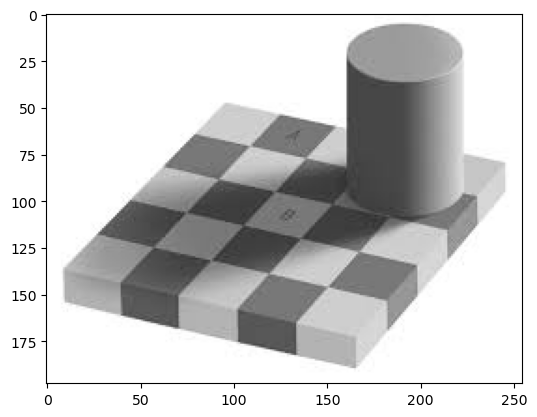

In [2]:
import matplotlib.pyplot as plt
plt.imshow(damier,cmap="gray")

In [3]:
damier.shape

(198, 255, 3)

C:\Users\dhimb\AppData\Local\Temp\ipykernel_13936\1103374380.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  paysage = imageio.imread("paysage_zen.png")


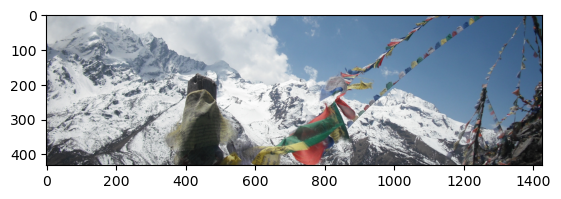

In [4]:
paysage = imageio.imread("paysage_zen.png")
imageio.imwrite("paysage_zen.png", paysage)
plt.imshow(paysage)

In [5]:
paysage.shape

(432, 1426, 3)

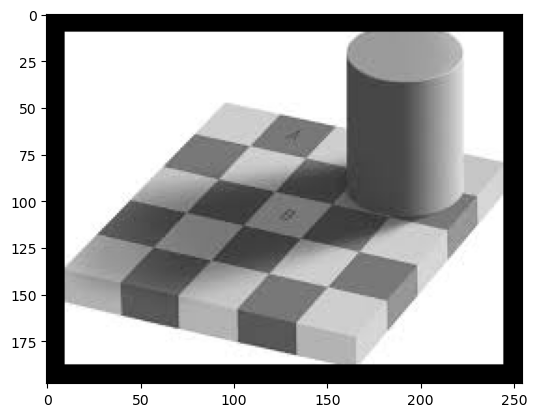

In [6]:
def bord(im,k):
    im_temp = im.copy()
    im_temp[:,:k] = 0
    im_temp[:,-k:] = 0
    im_temp[:k,:] = 0
    im_temp[-k:,:] = 0           
    return(im_temp)
 
plt.imshow(bord(damier,10),cmap="gray")

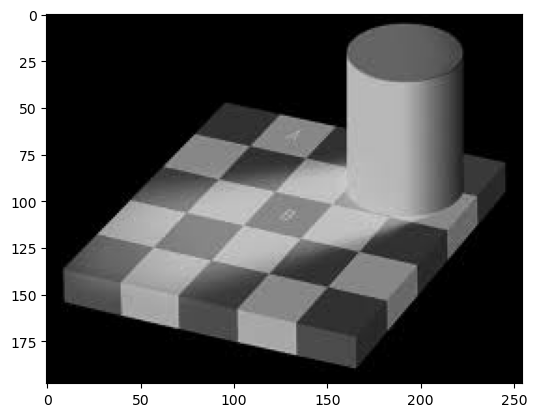

In [12]:
def inverse_intensity(im):
    im_temp = im.copy()
    im_temp = 255-im_temp    
    return(im_temp)
plt.imshow(inverse_intensity(damier),cmap="gray")

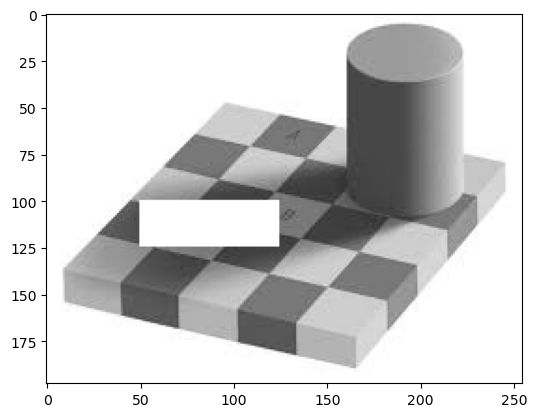

In [7]:
def masque(im,pos,lar,lon):
    im_temp = im.copy()
    im_temp[pos[0]:pos[0]+lon,pos[1]:pos[1]+lar] = 255
    return(im_temp)
plt.imshow(masque(damier,[100,50],75,25),cmap="gray")

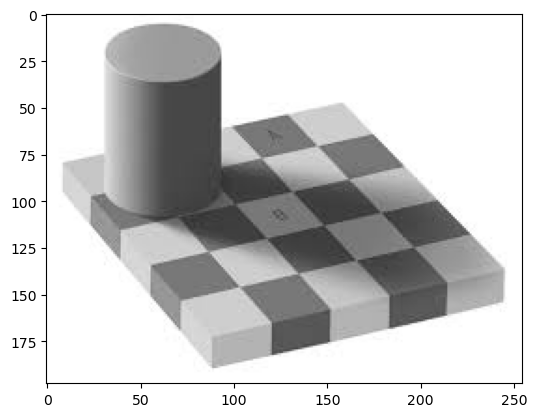

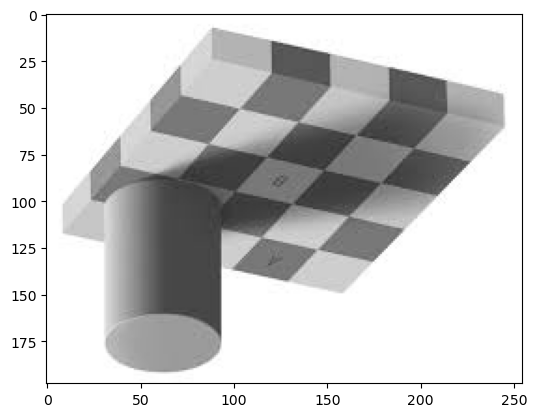

In [8]:
def mirroir(im,vertical=True):
    im_temp = im.copy()
    if vertical:
        im_temp = im_temp[:,::-1,:]
    else:
        im_temp = im_temp[::-1,:,:]
    return(im_temp)
damier = mirroir(damier,True)
plt.imshow(damier,cmap="gray")
plt.show()
plt.imshow(mirroir(damier,False),cmap="gray")

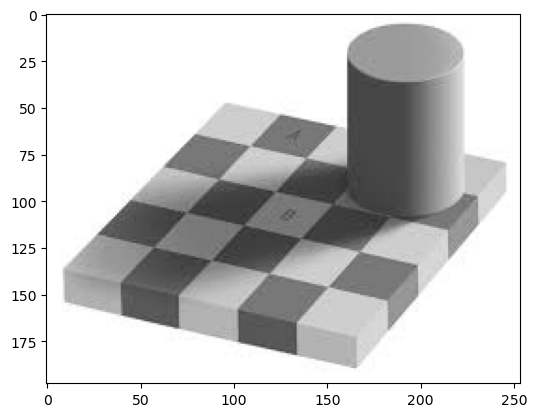

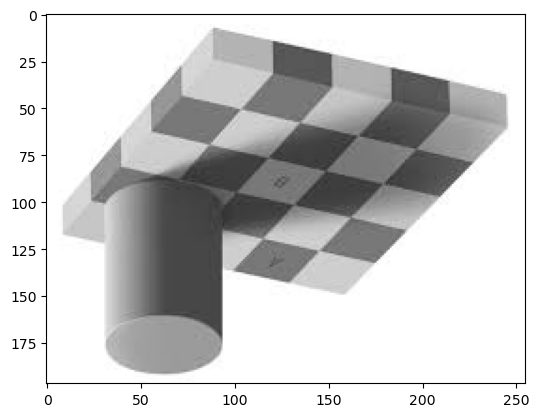

In [9]:
def mirroir(im,vertical=True):
    im_temp = im.copy()
    if vertical:
        im_temp = im_temp[:,np.arange(im_temp.shape[1]-1,0,-1)]
    else:
        im_temp = im_temp[np.arange(im_temp.shape[0]-1,0,-1),:]
    return(im_temp)
plt.imshow(mirroir(damier),cmap="gray")
plt.show()
plt.imshow(mirroir(damier,False),cmap="gray")
plt.show()

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


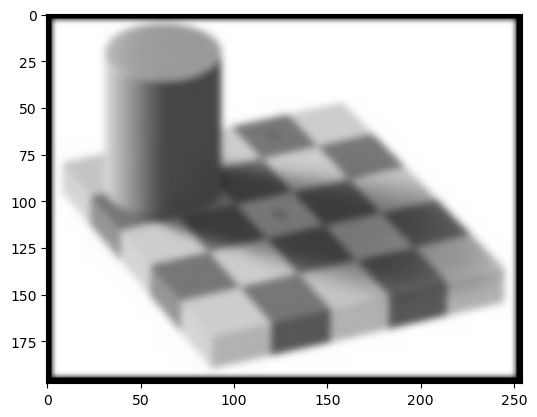

In [10]:
# Filtrer
 
K = np.array([[1,2,4,2,1],[2,4,8,4,2],[4,8,16,8,4],[2,4,8,4,2],[1,2,4,2,1]])/100.0
print(K)
def filtrer(im,K):
    im_temp = im.copy()*0
    s = int((K.shape[0]+1)/2)
    for i in range(s,im.shape[0]-s):
        for j in range(s,im.shape[1]-s):
            im_temp[i,j] = np.sum(K*im[i-(s-1):i+s,j-(s-1):j+s])
    return(im_temp)
 
plt.imshow(filtrer(filtrer(filtrer(damier[:,:,0],K),K),K),cmap="gray")